In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#comment below if not using ipython notebook
%matplotlib inline

### load the CSV file into a dataframe

In [2]:
df = pd.read_csv('Assignment3.csv')
for col in df.columns:
    df[col] = df[col].astype(float)
    
df.head()

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


There are 5 predictor variables and one output variable. Let's blinded fit an OLS model to find if we can get a solution!

### prepare the dataset for regression

In [15]:
xx = np.array(df[['x1','x2','x3','x4','x5']])
yy = np.expand_dims(df['y'], 1)

### helper methods

In [16]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)


### fit the OLS model and check the loss.

In [17]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(xx, yy)
yhat = model1.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("Loss :",loss)

Beta : [[-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
   1.62848730e+00]]  Bias : [-9655.31030896]
Loss : 71877.84134016866


The loss is observed to very high!  Something's fishy.  Ain't it!?

### let's check the statistics of the features and outputs.

In [6]:
df.describe()

,x1,x2,x3,x4,x5,y
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,7.548713,23.755050,111.371386,98.133762,34.000000,10244.460297
std,0.380115,292.850177,55.812213,4.942089,30.557704,1022.766123
min,6.680000,-466.860000,9.800000,86.830000,0.000000,8062.540000
25%,7.250000,-208.890000,66.380000,94.240000,6.760000,9469.940000
50%,7.530000,38.950000,104.180000,97.900000,25.000000,10187.660000
75%,7.800000,262.920000,168.160000,101.420000,57.760000,10866.630000
max,8.370000,546.880000,195.810000,108.850000,100.000000,12631.050000


### let's check the correlation amongst the predictor variables.

In [7]:
corr = np.corrcoef(xx.T)
print(corr)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.        ]]


### let's check the features are correlating heavily.

In [8]:
print(corr > 0.9)

[[ True False False  True False]
 [False  True False False False]
 [False False  True False False]
 [ True False False  True False]
 [False False False False  True]]


Looks like feature 1 and feature 4 are heavily correlating.  It may be worth removing one of those features from our system.

### let's add the output column to the mix and re-evaluate the correlation coefficient.

In [9]:
all_data = np.concatenate((xx, yy), axis=1)
corr_all = np.corrcoef(all_data.T)
print(corr_all)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945  0.9982136 ]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306  0.71670271]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155 -0.22026513]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718  0.99826603]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.          0.04660974]
 [ 0.9982136   0.71670271 -0.22026513  0.99826603  0.04660974  1.        ]]


In [10]:
print(corr_all > 0.7)

[[ True  True False  True False  True]
 [ True  True False  True False  True]
 [False False  True False False False]
 [ True  True False  True False  True]
 [False False False False  True False]
 [ True  True False  True False  True]]


Looks like features 1, 2 and 4 are strongly correlating with the output individually.  We see that the features 3 and 5 are not correlating well.  But, that doesn't mean that they are useless.  Remember, correlation is a linear relationship estimation method.  When the relationship is not-linear, correlation coefficient will not be conclusive.  So, our resolve here is; either the features are not relevant or there is a non-linear relationship amongst the features and the output.

### let's try to visualize the relationships through a pair-plot.

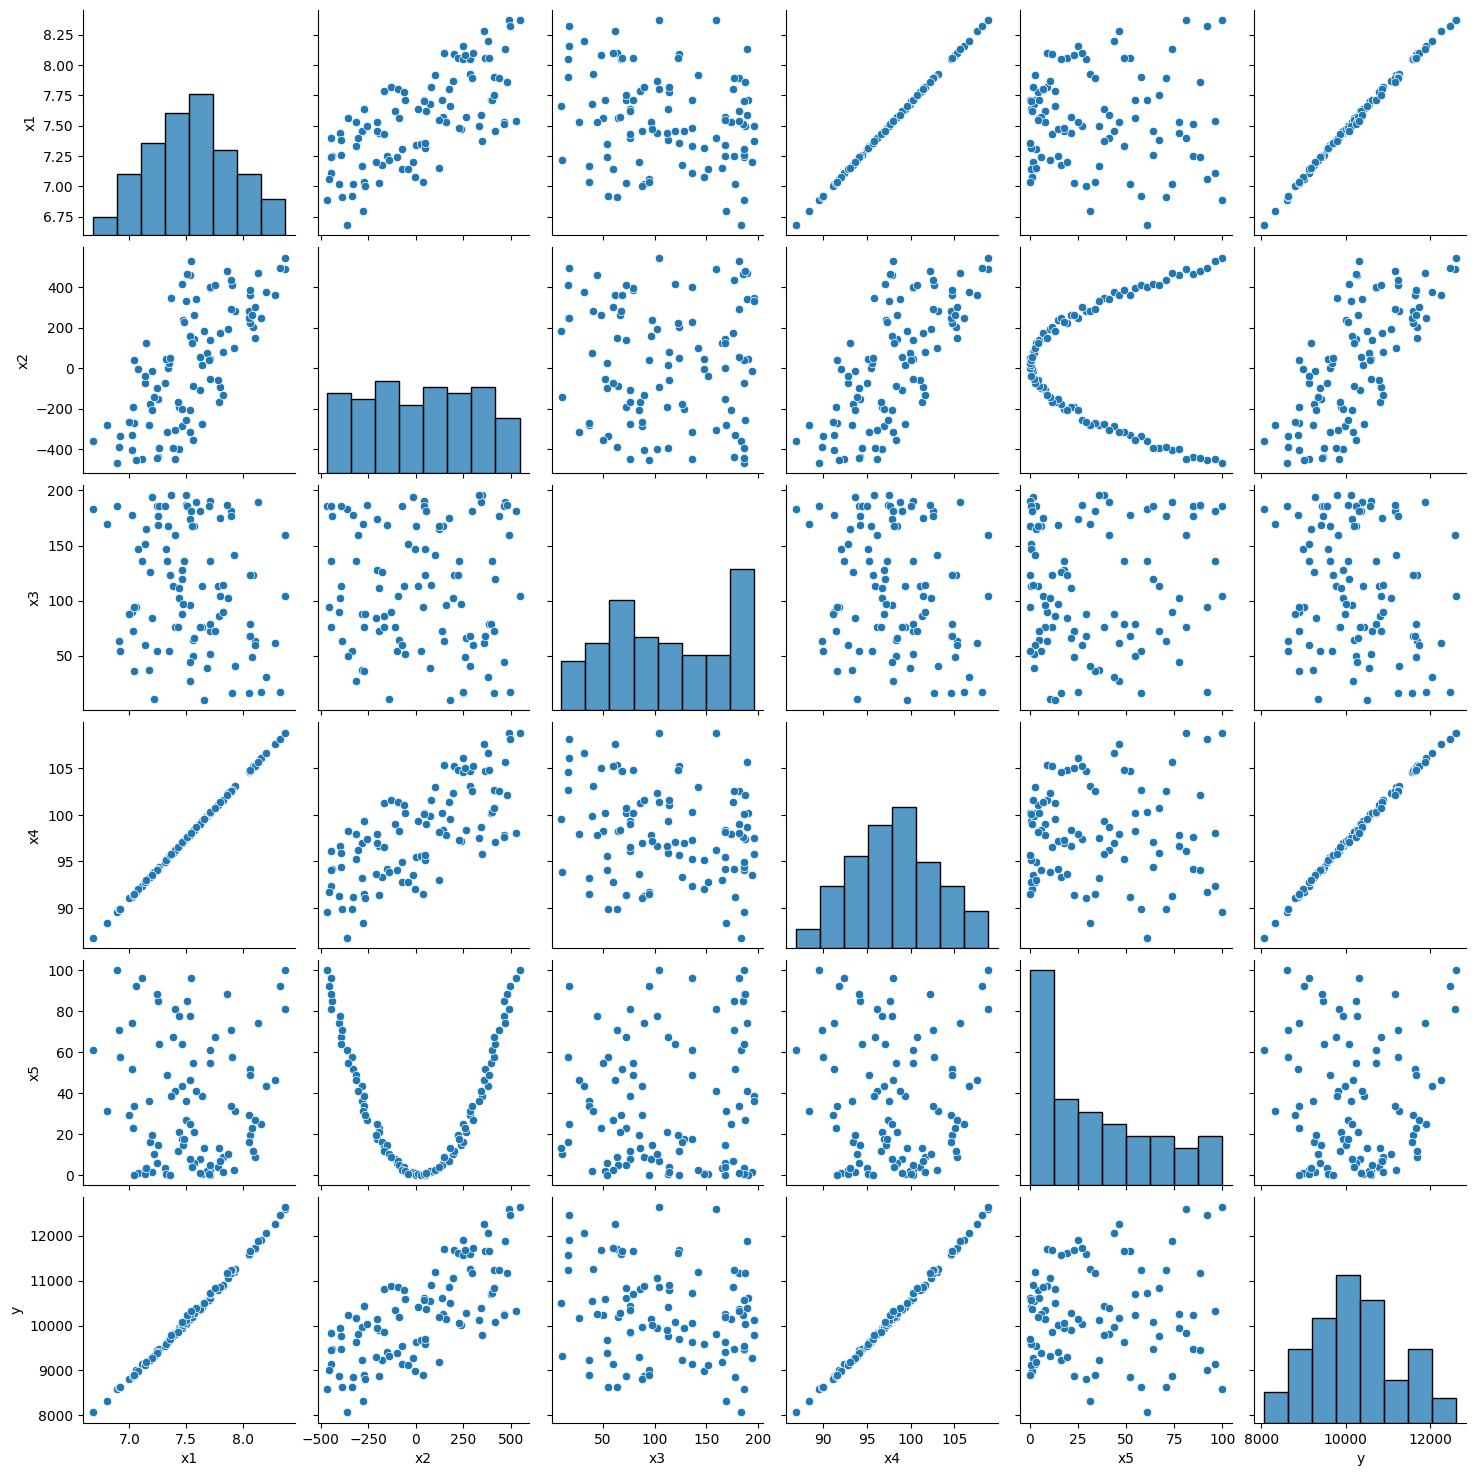

In [11]:
import seaborn as sb
sb.pairplot(df)

### Brilliant, more patterns have evolved.  And in fact, the mathematical model is almost visible from the plot!

#### Let's prepare the dataset for regression with polynomial feature expansion

In [66]:
xx = np.array(df[['x1','x2','x3','x4','x5']])
yy = np.expand_dims(df['y'], 1)

### expansion the features using PolynomialFeatures helper

In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 2)
xx_poly = poly_transformer.fit_transform(xx)
xx_poly.shape

(101, 21)

### fit the OLS model and check the loss.

In [119]:
from sklearn import linear_model
model_poly = linear_model.LinearRegression()
model_poly.fit(xx_poly, yy)
yhat_poly = model_poly.predict(xx_poly)
loss = SSE(yy, yhat_poly)
print("Beta :", model_poly.coef_, " Bias :", model_poly.intercept_)
print("Loss :",loss)

Beta : [[ 0.00000000e+00  7.29671640e+02  1.12106687e-01 -1.57554949e-02
  -5.09468908e+01  1.14846649e+00  1.98014492e+03 -4.67851170e-02
   2.90927341e-03 -3.12592058e+02  3.52514123e-01  7.24292655e-06
  -6.04923902e-06  3.48665993e-03 -2.27281864e-05  2.22660036e-05
  -1.10296154e-04  1.00355976e-05  1.33302144e+01 -2.57155986e-02
  -5.58022909e-05]]  Bias : [20.64348986]
Loss : 32.93236807626103


__The loss is observed to very low!  Let's visualize it!__

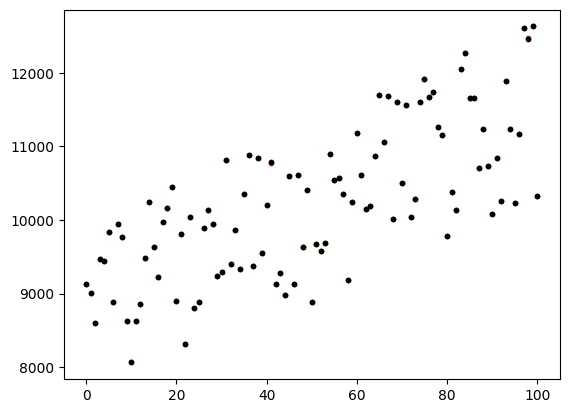

In [120]:
plt.plot(yy, 'r.')
plt.plot(yhat_poly, 'g.')
plt.plot(yhat, 'k.')
plt.show()

__still there are lot of features, can we use shrinkage methods to reduce feature count?__

Beta : [[ 0.00000000e+00  4.02400453e-01  1.16693480e-01 -2.04358956e-02
   4.75848977e+00  1.15686109e+00 -1.21682468e-01 -1.20881741e-01
   2.33372667e-01 -7.45842397e-01  3.42224401e-01  7.21640190e-06
  -6.61307107e-06  9.14019366e-03 -2.28102085e-05  2.54277478e-05
  -1.77954169e-02  6.40393901e-06  1.06161339e+00 -2.49967518e-02
  -5.39230231e-05]]  Bias : [39.70108799]
Loss : 33.262005704326235


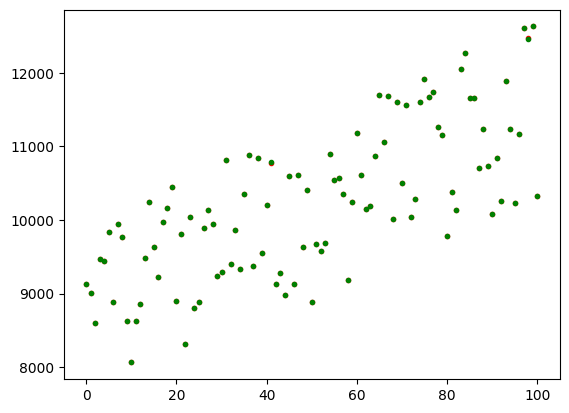

In [130]:
from sklearn import linear_model
model_ridge = linear_model.Ridge(alpha=.01, max_iter=500)
model_ridge.fit(xx_poly, yy)
yhat_ridge = model_ridge.predict(xx_poly)
loss = SSE(yy, yhat_ridge)
print("Beta :", model_ridge.coef_, " Bias :", model_ridge.intercept_)
print("Loss :",loss)
plt.plot(yy, 'r.')
#plt.plot(yhat_poly, 'k.')
plt.plot(yhat_ridge, 'g.')
plt.show()  

__let's try using principal component analysis to extract useful features__

In [131]:
from sklearn.decomposition import PCA

__let's extract the principal components.  also review the amount of variance those two components capture in total.  more the components, more the information from the data is captured.__

In [202]:
pca = PCA(n_components=12)
pca.fit(X=xx_poly)
print("Vaiances captured by the components :", pca.explained_variance_ratio_)
print("Total variance information captured :", 100*round(np.sum(pca.explained_variance_ratio_),2), "%")

Vaiances captured by the components : [6.97308845e-01 2.60801744e-01 2.32283637e-02 1.31087325e-02
 4.96740404e-03 3.09681447e-04 1.53502079e-04 7.32360169e-05
 3.94003749e-05 9.07963458e-06 1.06773346e-08 3.42581375e-10]
Total variance information captured : 100.0 %


__let's review the weights of the linear combination of the input features that construct the principal components__

In [203]:
print("Shape of the transformation matrix :", pca.components_.shape)
print("Transformation matrix : ", pca.components_)
print("Variances :", pca.explained_variance_)

Shape of the transformation matrix : (12, 21)
Transformation matrix :  [[-0.00000000e+00  9.90832423e-07  1.10029818e-03  5.88167865e-05
   1.28802223e-05  3.67021777e-04  1.57090673e-05  9.10641368e-03
   5.39296326e-04  2.04241977e-04  2.82769138e-03  9.78693673e-01
   1.29186433e-01  1.18408191e-01  7.92892602e-02  1.86694033e-02
   7.01541640e-03  4.77574594e-02  2.65545938e-03  3.67592718e-02
   3.21377727e-02]
 [ 0.00000000e+00 -4.74695468e-06 -5.53853614e-03 -4.28200026e-06
  -6.18458836e-05  1.84153757e-04 -7.13720029e-05 -4.14167482e-02
  -6.31341638e-04 -9.28839133e-04  1.08617335e-03  1.89756015e-01
  -7.39345184e-01 -5.38399864e-01 -3.52861837e-01 -6.38393507e-03
  -8.22742696e-03  2.27598568e-02 -1.20879502e-02  1.41094316e-02
   1.59783050e-02]
 [ 0.00000000e+00  8.30820415e-06  2.75171239e-03 -3.59292211e-03
   1.08262439e-04 -4.10575685e-05  1.28159754e-04  2.23569130e-02
  -2.66106847e-02  1.66795466e-03  9.72694400e-05  1.37381575e-02
  -2.87758706e-01  2.90550242e-01

__let's project the data into the PC space to visualize any obvious patterns__

Shape of the transformed input space : (101, 12)


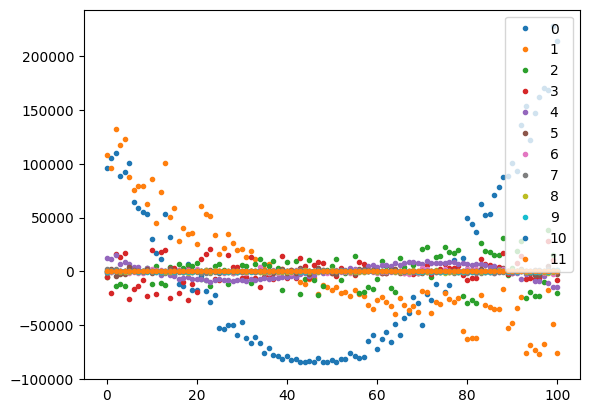

In [204]:
xx_transformed = pca.transform(xx_poly)
print("Shape of the transformed input space :", xx_transformed.shape)
plt.plot(xx_transformed, '.')
plt.legend([str(_) for _ in range(xx_transformed.shape[1])])

__fit a linear regression on the pricipal component transformed space to check if it helps reducing the loss further__

In [205]:
model2 = linear_model.LinearRegression()
model2.fit(xx_transformed, yy)
yhat2 = model2.predict(xx_transformed)
loss2 = SSE(yy, yhat2)
print("Beta :", model2.coef_, " Bias :", model2.intercept_)
print("Loss :",loss2)

Beta : [[ 3.31308469e-03 -1.27436872e-02  2.25286275e-02  1.53298938e-02
   2.27123242e-02 -3.89788871e-04 -2.69731837e-01 -1.51181778e-01
  -9.58577640e-01  1.73642723e-01 -2.05861656e-01  3.61569962e-02]]  Bias : [10244.46029703]
Loss : 165.0996059896358


__the loss stands higher than the vanilla model with lesser number of components, unfortunately!!  Nonetheless, PCA gives us reduction by 1 feature count without much of a loss in performance__

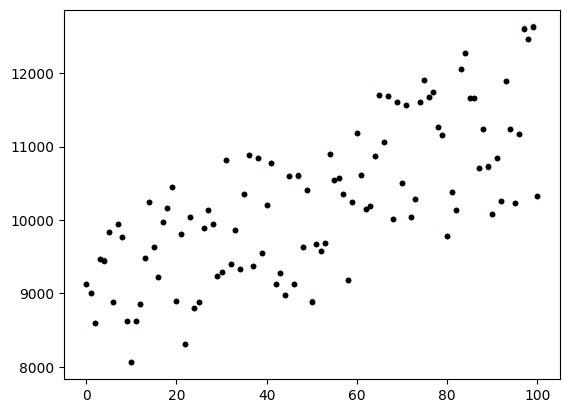

Gap : 132.16723785424784


In [206]:
plt.plot(yy, 'r.')
plt.plot(yhat2, 'g.')
plt.plot(yhat, 'k.')
plt.show()
print("Gap :", SSE(yhat, yhat2))

__Now, we are motivated to check out the non-linear PCA, called Kernel PCA__

In [246]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=15, kernel='rbf', gamma=0.00000000001)
kpca = KernelPCA(n_components=10, kernel='poly', degree=2)
kpca.fit(X=xx)

KernelPCA(degree=2, kernel='poly', n_components=10)

__let's project the data into the PC space to visualize any obvious patterns__

Shape of the transformed input space : (101, 10)


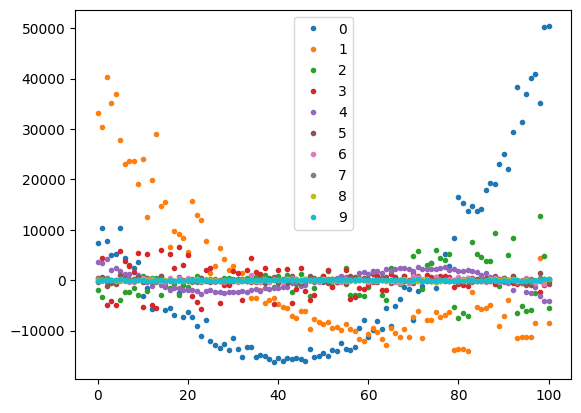

In [247]:
xx_transformed_k = kpca.transform(xx)
print("Shape of the transformed input space :", xx_transformed_k.shape)
plt.plot(xx_transformed_k, '.')
plt.legend([str(_) for _ in range(xx_transformed_k.shape[1])])

__fit a linear regression on the pricipal component transformed space to check if it helps reducing the loss further__

In [248]:
model3 = linear_model.LinearRegression()
model3.fit(xx_transformed_k, yy)
yhat3 = model3.predict(xx_transformed_k)
loss3 = SSE(yy, yhat3)
print("Beta :", model3.coef_, " Bias :", model3.intercept_)
print("Loss :",loss3)

Beta : [[ 2.69666746e-02 -3.80764990e-02  1.02703836e-01  3.14741356e-03
   7.99886632e-02  2.83529090e-02 -9.21875337e-01 -5.74431046e-01
  -4.70407538e+00  1.62902184e+00]]  Bias : [10244.46029703]
Loss : 665.5489254233249


__the loss stands higher than the vanilla model, unfortunately!!__

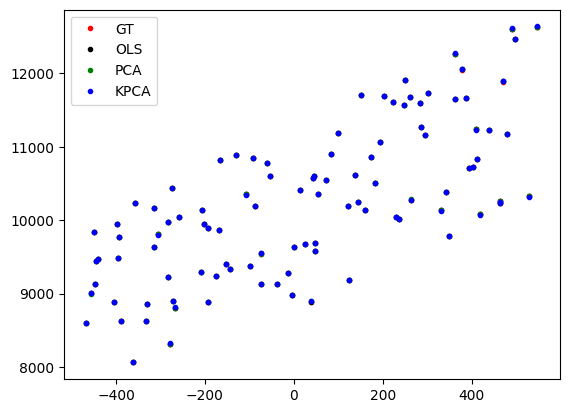

In [249]:
plt.plot(xx[:,1], yy, 'r.')
plt.plot(xx[:,1],yhat, 'k.')
plt.plot(xx[:,1],yhat2, 'g.')
plt.plot(xx[:,1],yhat3, 'b.')

plt.legend(['GT', 'OLS', 'PCA', 'KPCA'], loc='upper left')